In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'/content/chronickidneydisease.csv')

In [4]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [5]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [8]:
df['pcv'].value_counts()

41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: pcv, dtype: int64

In [9]:
df['wc'].value_counts()

9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19100     1
\t?       1
12300     1
14900     1
12700     1
Name: wc, Length: 92, dtype: int64

In [10]:
df['rc'].value_counts()

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
4.6     9
3.4     9
5.9     8
5.5     8
6.1     8
5.0     8
3.7     8
5.3     7
5.8     7
5.4     7
3.8     7
5.6     6
4.3     6
4.2     6
3.2     5
4.4     5
5.7     5
6.4     5
5.1     5
6.2     5
6.5     5
4.1     5
3.6     4
6.3     4
6.0     4
4.0     3
3.3     3
4       3
3.5     3
2.9     2
3.1     2
2.6     2
2.1     2
2.5     2
2.8     2
3.0     2
2.7     2
5       2
2.3     1
\t?     1
2.4     1
3       1
8.0     1
Name: rc, dtype: int64

In [11]:
df['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [12]:
df['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [13]:
df['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [15]:
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))
#explicitly converting numerical columns 
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [16]:
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [17]:
#handling missing data
df.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
ane                 1
appet               1
pe                  1
id                  0
classification      0
dtype: int64

In [18]:
df['rbc'].mode()

0    normal
dtype: object

In [19]:
df['pc'].mode()

0    normal
dtype: object

In [20]:
df['pcc'].mode()

0    notpresent
dtype: object

In [21]:
df['ba'].mode()

0    notpresent
dtype: object

In [22]:
df['htn'].mode()

0    no
dtype: object

In [23]:
df['dm'].mode()

0    no
dtype: object

In [24]:
df['cad'].mode()

0    no
dtype: object

In [25]:
df['appet'].mode()


0    good
dtype: object

In [26]:
df['pe'].mode()

0    no
dtype: object

In [27]:
df['ane'].mode()

0    no
dtype: object

In [28]:
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [29]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [30]:
df.isna().sum().sort_values(ascending=False)

id                0
age               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
pot               0
sod               0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
bp                0
classification    0
dtype: int64

In [31]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [32]:
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

In [33]:
df['classification'].unique()

array([1, 0])

In [34]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})

In [35]:
from sklearn.model_selection import train_test_split
x=df.drop('classification',axis=1)#independent
y=df['classification']#dependent

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 25) , X_test size (80, 25)


In [36]:
import warnings
from decimal import Decimal
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
# ignore warnings generated due to usage of old version of tensorflow
warnings.simplefilter("ignore")

In [37]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,...,47.0,6700.0,4.9,0,0,0,0,0,0,0
396,396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,...,54.0,7800.0,6.2,0,0,0,0,0,0,0
397,397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,...,49.0,6600.0,5.4,0,0,0,0,0,0,0
398,398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,...,51.0,7200.0,5.9,0,0,0,0,0,0,0


In [38]:
y = df['classification']
X = df.drop(['classification','id'], axis = 1)
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0


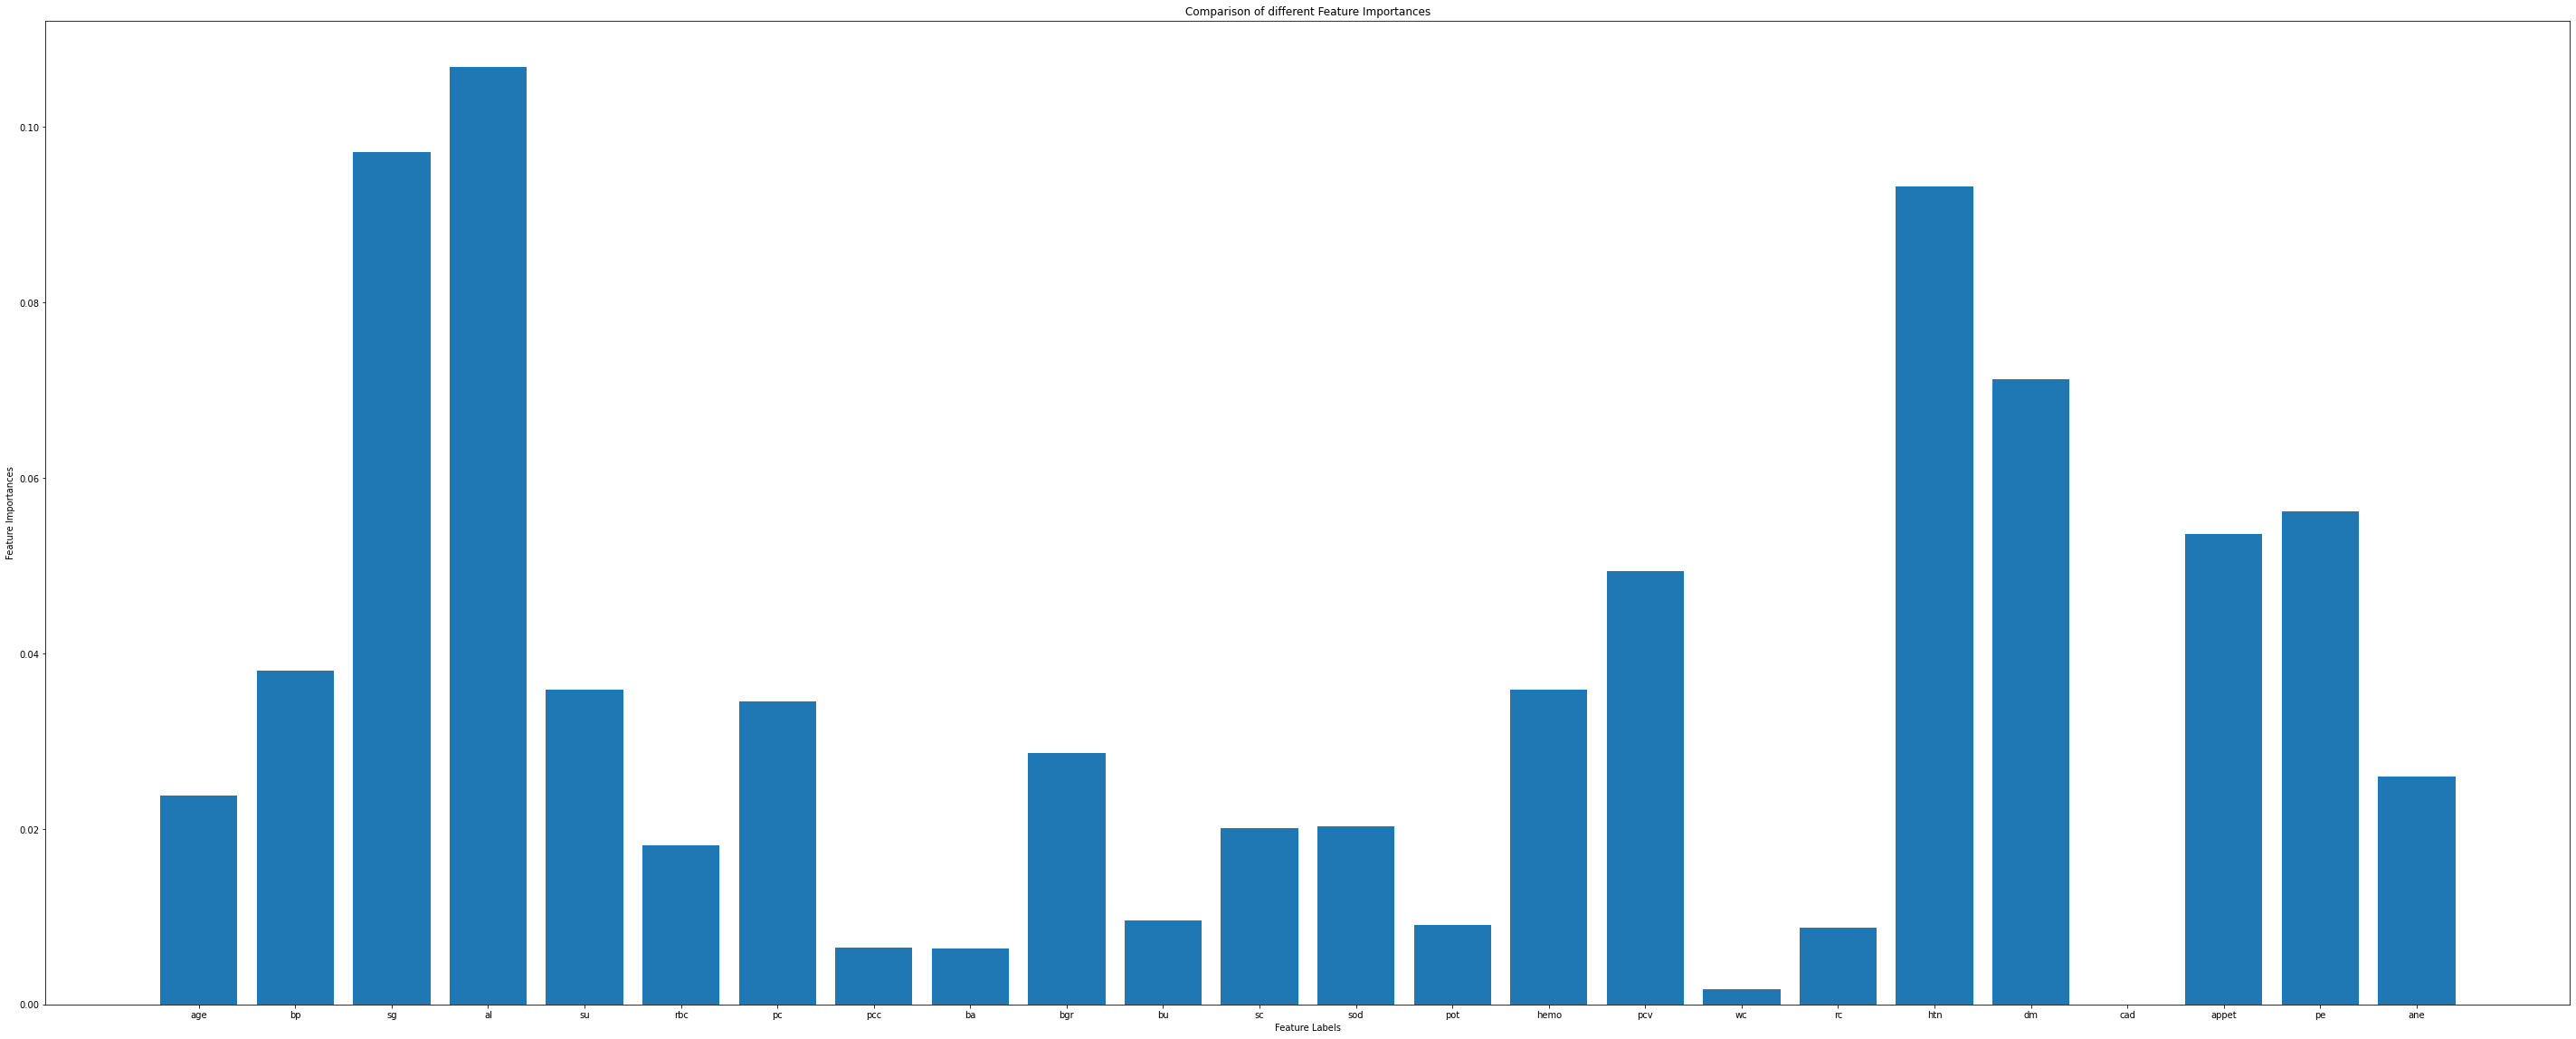

Index(['sg', 'dm', 'pcv', 'htn', 'al', 'appet', 'pe', 'hemo', 'pc', 'bp'], dtype='object')


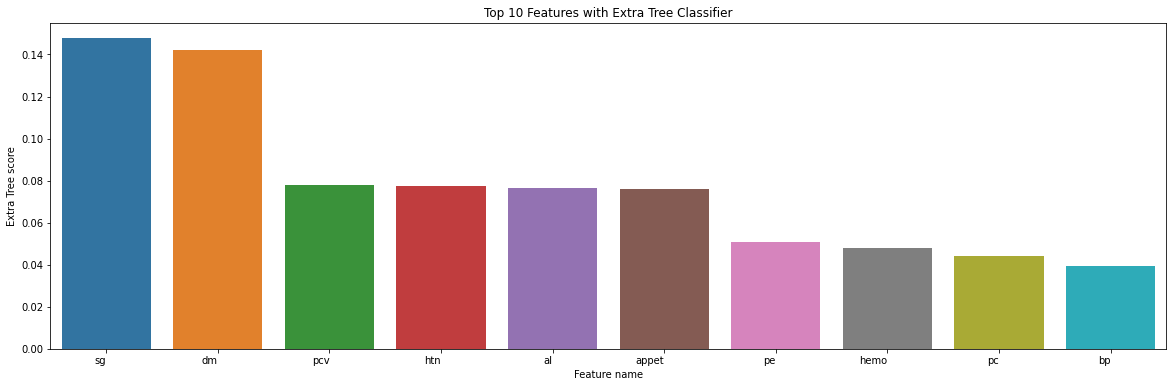

In [42]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_],
										axis = 0)
plt.figure(figsize=(50,20))
plt.bar(X.columns, feature_importance_normalized)

plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()
feature_scores=pd.DataFrame(extra_tree_forest.feature_importances_,columns=['Score'],index=X.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])
plt.figure(figsize=(20,6))
print(top10_feature.index)
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Extra Tree Classifier')
p = plt.xlabel('Feature name')
p = plt.ylabel('Extra Tree score')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')


In [43]:
top10_feature.index

Index(['sg', 'dm', 'pcv', 'htn', 'al', 'appet', 'pe', 'hemo', 'pc', 'bp'], dtype='object')

In [44]:
X.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [45]:
for ele in X.columns:
  if ele not in top10_feature.index:
    X = X.drop(ele, axis = 1)

In [46]:
X.head()

,bp,sg,al,pc,hemo,pcv,htn,dm,appet,pe
0,80.0,1.020,1.0,0,15.4,44.0,1,1,0,0
1,50.0,1.020,4.0,0,11.3,38.0,0,0,0,0
2,80.0,1.010,2.0,0,9.6,31.0,0,1,1,0
3,70.0,1.005,4.0,1,11.2,32.0,1,0,1,1
4,80.0,1.010,2.0,0,11.6,35.0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = None)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report